<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L230717.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

리스트

튜플

집합

딕셔너리

문자열

0. 반복문, 조건문

        for i in range(10):
             print(i)

         if not in (sequence) :    
            satement
         else:

1. 문자열

    - strip, split, replace, join


2. 리스트

    - append, extend

    - [ ], list()

    - 인덱싱 : list_name[0], list_name[-1]

    - 슬라이싱 : list_name[start:stop:step]

3. 튜플

    - ( ), tuple()

    - (3,)

4. 집합

    - set()

    - 중복제거

5. 딕셔너리

    - { }, dict()

    - dict_name[key] = value

    - keys(), values(), item()

6. 함수

    - 함수 정의

          def func_name(parameters):
            ''' doc string '''
            statements
            return (result)

    - 함수 호출(사용)

    - func_name(arguments)

    - positional arguments, keyword arguments

7. module, client 사용

In [ ]:
import numpy as np

In [ ]:
help(np.dot)

instance = object

In [ ]:
isinstance((124,), tuple)

True

#유효 범위

<파이썬 3 바이블, 이강성, 프리렉>

유효 범위 규칙(scope rule) 이란 유효하게 사용되는 문맥(Context) 범위를 정하는 규칙

- 변수가 특정 범위에서 유효한지를 결정


##LEGB

파이썬에서 변수에 값을 바인딩하거나 변수의 값을 참조하는 경우 LEGB 규칙을 따릅니다.

LEGB는 각각 다음과 같은 의미를 가집니다.


L -	Local의 약자로 함수 안을 의미합니다.

E -	Enclosed function local 의 약자로 내부함수에서 자신의 외부 함수의 범위를 의미합니다.

G -	Global의 약자로 함수 바깥 즉, 모듈 범위입니다.

B -	Built-in의 약자로 open, range와 같은 파이썬 내장 함수들을 의미합니다.


## 변수가 저장되는 이름 공간은 변수가 어디에서 정의(혹은 치환)되었는지에 따라서 결정된다.

In [ ]:
x = 10         # G
y = 11

def foo():
    x = 20     # foo 함수의 L에, bar 함수의 E에 해당
    def bar():
        a = 30              # L에 해당
        print(a, x, y)      # 각 순서대로 L, E, G에 해당
    bar()                   # 30, 20, 11
    x = 40
    bar()                   # 30, 40, 11

foo()

30 20 11
30 40 11


In [ ]:
def test():
    xy = 20
    print(xy)

In [ ]:
test()

20


In [ ]:
xy

NameError: ignored

변수를 찾아 가는 과정

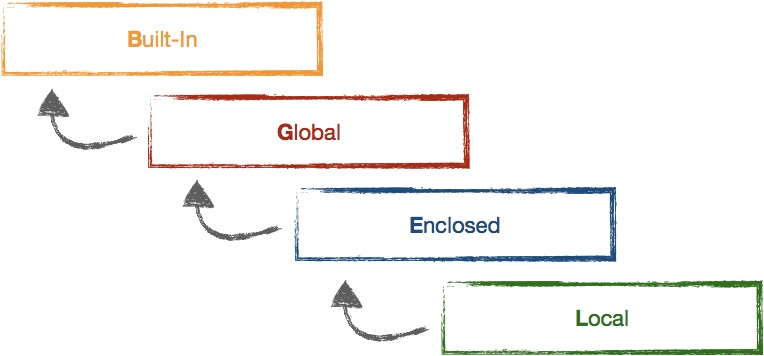

In [ ]:
sum([1,2])

3

In [ ]:
sum = 50

In [ ]:
sum

50

In [ ]:
del sum

In [ ]:
sum([1,2])

3

#global 문

In [ ]:
def f(a):
    global h
    h = a + 10

In [ ]:
f(10)

In [ ]:
h

20

In [ ]:
g = 10
def f():
    #global g
    a = g
    g = 20
    return a

In [ ]:
f()

10

In [ ]:
g

20

In [ ]:
a

NameError: ignored

nonlocal

##nonlocal 문

- 전역 영역이 아닌 곳에서

- 중첩된 함수의 변수를 사용하고자 할 때 nolocal을 선언한다.

In [ ]:
def outer():
    x = 1 #L, E
    def inner():
        nonlocal x
        x = 2
        print('inner : ', x)
    inner()
    print('outer : ', x)

In [ ]:
outer()

inner :  2
outer :  2


In [ ]:
def makeCounter():
    count = 0
    def counter():
        count += 1
        return count
    return counter

In [ ]:
c1 = makeCounter()

In [ ]:
c1()

UnboundLocalError: ignored

In [ ]:
def makeCounter():
    count = 0

    def counter():
        nonlocal count  # 외부 변수 count를 수정하기 위해 nonlocal 키워드 사용
        count += 1 # count = count + 1
        return count

    return counter

c1 = makeCounter()
print(c1())  # 출력: 1
print(c1())  # 출력: 2
print(c1())  # 출력: 3

1
2
3


In [ ]:
c2 = makeCounter()

In [ ]:
c2()

1

In [ ]:
c1()

4

In [ ]:
def makeCounter():
    count = []
    def counter():
        count.append(1)
        return count
    return counter

In [ ]:
c1 = makeCounter()

In [ ]:
c1()

[1]

In [ ]:
def makeCounter():
    count = []
    def counter():
        nonlocal count
        count += [1] # count = count + [1]
        return count
    return counter

In [ ]:
sums = 0
for i in range(10):
    sums = sums + i

In [ ]:
c2 = makeCounter()

In [ ]:
[ ] + [1]

[1]

In [ ]:
c2()

[1]

#함수 클로저

함수 클로저란 함수가 참조할 수 있는 비지역 변수나 자유변수를 저장한 심볼 테이블 혹은 참조 환경이 함수와 함께 제공되는 것이다.

심볼 테이블이란 변수들이 저당되는 공간이다.

함수 클로저 조건

    1. 함수가 중첩

    2. 내부 함수에서 외부 함수의 값을 참조

    3. 외부 함수가 내부함수를 반환해줘야 한다.

In [ ]:
def quadratic(a, b, c):
    # This is the outer enclosing function
    cache = {}
    def f(x):
        # This is the nested function
        if x in cache: # x = 1, 1 in cache, cache={} False
            return cache[x]
        y = a*x*x + b*x + c # y = 4
        cache[x]=y
        return y
    return f # returns the nested function

f1 = quadratic(1, 2, 1)
print(f1(1))
f2 = quadratic(1,6,9)
f2(1)

4


16

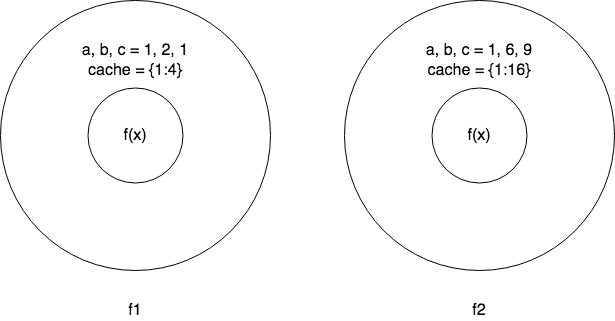

In [ ]:
cache = {1:10, 2:20}

In [ ]:
2 in cache

True

In [ ]:
cache[1]

10

1. 약수 구하는 함수

        함수 호출 : divisor(n)

        입력: n = 6

        출력 : [1, 2, 3, 6]


In [ ]:
def divisor(n):
    divisors = []
    for i in range(1, n+1):
        if n % i == 0:
            divisors.append(i)
    return divisors

n = 6
result = divisor(n)
print(result)

[1, 2, 3, 6]


In [ ]:
def add_(n):
    sums = 0
    for i in range(n+1):
        sums += i
    return sums

In [ ]:
add_(10) # 10 + add_(9), 10 + 9 + add_(8)

55

10 + 9 + ... + add_(1)

In [ ]:
def add_recur(n):
    if n == 1 :
        return 1
    return n + add_recur(n-1)

In [ ]:
add_recur(3)

6

add_recur(3) = 3 + add_recur(2)

             = 3 + 2 + add_recur(1)

             = 3 + 2 + 1(n==1)

최대 공약수 구하기 (유클리드 호제법)

4 / 2 : 4가 피제수, 2가 제수

In [ ]:
def gcd(a, b):
    while b != 0:
        a = a % b
        a, b = b, a
    return a


        a//b + a%b

        b//(a%b) + b%(a%b)

        (a <==b, b <== a%b)

        a//b + a%b


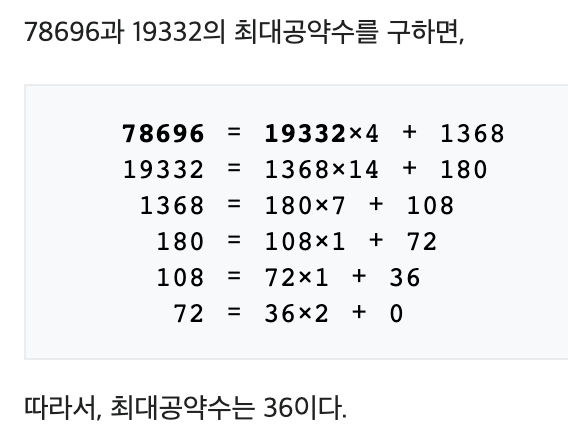

In [ ]:
gcd(78696, 19332)

36

재귀 함수 -> 그림

하노이탑

- 한번에 한 원반만 옮긴다.

- 원반 위에 더 큰 원반이 올라갈 수 없다.

(프로그램적으로는 pole1에서 왼쪽은 pole3 를 의미한다. pole3에서 오른쪽은 pole1을 의미한다.)

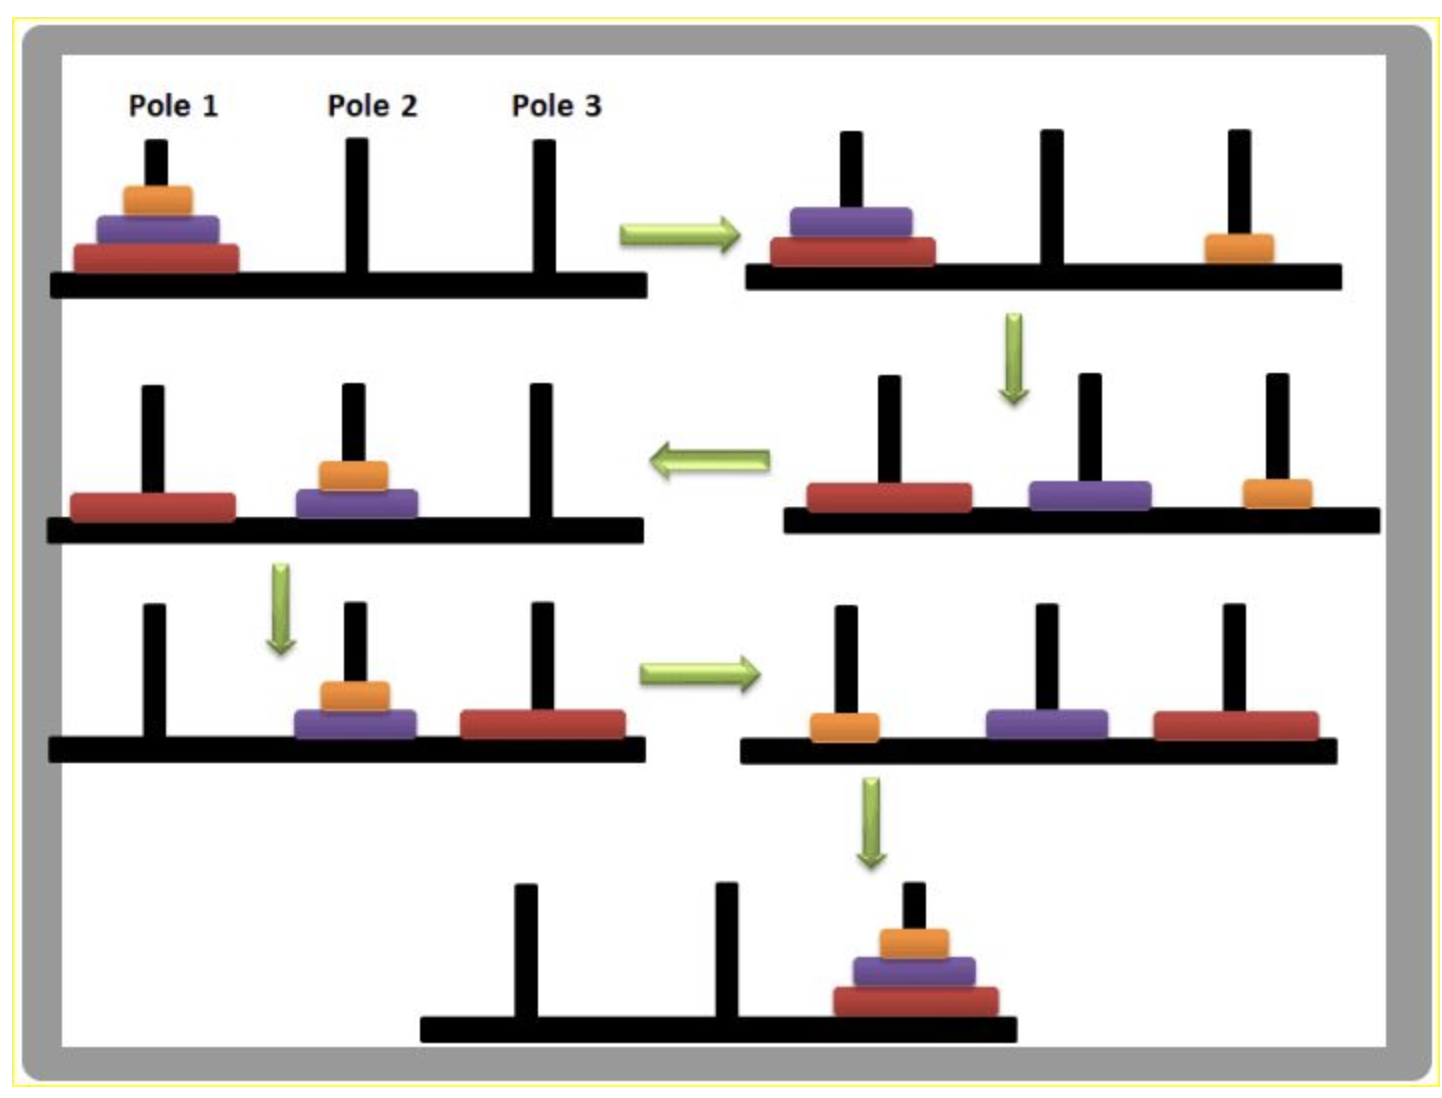

In [ ]:
add_recur(100)

5050

In [ ]:
def hanoi(n, source, target, auxiliary):
    if n > 0:
        hanoi(n - 1, source, auxiliary, target)
        print('Move disk %s from pole %s to pole %s' % (n, source, target))
        hanoi(n - 1, auxiliary, target, source)

In [ ]:
hanoi(2, 1, 2, 3)

Move disk 1 from pole 1 to pole 3
Move disk 2 from pole 1 to pole 2
Move disk 1 from pole 3 to pole 2


In [ ]:
def moves(n, left):
    if n==0 : return
    moves(n-1, not left)
    if left:
        print(f'{n} left')
    else:
        print(f'{n} right')
    moves(n-1, not left)

In [ ]:
moves(2, True) # 1 오른쪽, 2 왼쪽, 1 오른쪽

1 right
2 left
1 right
